# Python for Data Analysis
In this lesson, we go over the main packages for reading and analyzing data in python.

#### numpy:
- A package for doing array manipulation and linear algebra calculations.
#### scipy:
- A package for doing numerical optimization and mimicing statistical distributions.
#### pandas:
- A package for reading, manipulating, and analyzing different types of data.
#### statsmodels:
- A package for doing statistical modeling similar to STATA or R.

With these four packages we can manipulate and analyze most datasets in economics.

Our main goal will be to use these packages to generate pseudo-data and re-estimate the parameters using OLS three different ways. 

#### Check for packages

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import statsmodels as sm

## Using numpy
#### Creating arrays

In [2]:
# of a sequence
np.array(range(10))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [3]:
# of only ones
np.ones(10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [4]:
# of only zeros
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [5]:
# also works on nested lists!
np.array([[1,2,3],[4,5,6],[7,8,9]])

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [6]:
# or create an identity matrix 
np.eye(10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

#### Array operations

In [7]:
# reshaping a 1-d array to 2-d
mat = np.array(range(9))

mat = mat.reshape(3,3)
mat

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [8]:
# transposing
mat.T

array([[0, 3, 6],
       [1, 4, 7],
       [2, 5, 8]])

In [9]:
# inversing
from numpy.linalg import inv
np.random.seed(10)
X = np.random.randn(9).reshape(3,3)
X

array([[ 1.3315865 ,  0.71527897, -1.54540029],
       [-0.00838385,  0.62133597, -0.72008556],
       [ 0.26551159,  0.10854853,  0.00429143]])

In [10]:
inv(X)

array([[ 0.35567819, -0.75165951,  1.95879181],
       [-0.84113757,  1.83067898,  4.27625622],
       [-0.72992851,  0.19965476,  3.66702202]])

Matrix multiplication has a very nice short hand: "@"

So X'X is:


In [11]:
X.T@X

array([[ 1.84368931,  0.97606753, -2.05065766],
       [ 0.97606753,  0.90946519, -1.55234157],
       [-2.05065766, -1.55234157,  2.90680369]])

#### Technical Note:
Above we used part of the __random__ package from numpy, **randn**, to draw random numbers from the standard normal distribution.

### Exercise: 
Generate $X$, a 5x5 matrix of random numbers drawn from the standard normal distribution, and calculate $(X'X)^{-1}$

#### Solution:

In [12]:
np.random.seed(10)
X = np.random.randn(25).reshape(5,5)
inv(X.T@X)

array([[2.34959409, 0.82612281, 3.45239955, 1.12731933, 2.0945174 ],
       [0.82612281, 0.98318033, 1.83039148, 0.75219511, 0.81277252],
       [3.45239955, 1.83039148, 5.95161997, 1.96017227, 3.27062938],
       [1.12731933, 0.75219511, 1.96017227, 0.84377508, 0.98532173],
       [2.0945174 , 0.81277252, 3.27062938, 0.98532173, 2.29237912]])

## Using scipy
creating a normal distribution to draw from.

In [81]:
from scipy.stats import norm

In [82]:
# Make a normal distribution with mean (loc) 2 and standard deviation (scale) 1
dist = norm(loc=2,scale=1)

# the object "dist" has several methods attached to it including:
# random draws
draws = dist.rvs(100)
print(draws)

# the mean
print(dist.mean())

# the pdf of several draws:
print(dist.pdf(draws))

# the cdf of several draws:
print(dist.cdf(draws))


[1.83611593 2.80691838 2.14541863 3.54601797 2.47588111 1.8233337
 2.13665961 3.3934692  1.51539129 1.44790488 0.74322765 1.69462343
 0.22162573 2.71728831 2.05842486 1.27422219 2.08168551 3.15315241
 2.01881884 4.35469748 3.53104407 2.22882434 1.54259115 2.30372215
 3.98915068 1.16172224 3.5218932  1.59572452 2.17560071 3.38561587
 2.80849687 1.94945171 3.34511868 0.99291049 3.40872571 3.470124
 2.27493332 1.22015403 1.35772117 1.1187866  0.71815762 2.59941734
 3.34261186 1.43696313 2.24420945 2.38317931 1.92062529 3.26639348
 3.38094699 1.81885319 1.53813355 3.3320765  2.0313767  2.01309081
 1.2192145  1.78753234 0.88285571 2.38064388 2.43959743 2.73087733
 0.19365368 0.32532626 1.44200351 1.302719   2.054679   2.27128358
 3.22761936 3.66086385 2.02687072 1.75966123 2.58543235 0.04773423
 1.46930805 1.35355249 0.64208829 2.84671669 1.95670868 1.63253423
 2.19564185 2.64640326 1.03311664 1.14738346 2.72341997 1.45291147
 2.59820184 0.54066385 1.87979415 1.86059064 1.88591884 3.1529719

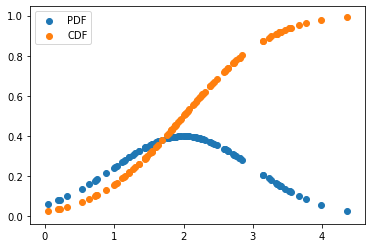

In [83]:
# now here is those things above but plotted:
plt.scatter(draws,dist.pdf(draws),label='PDF')
plt.scatter(draws,dist.cdf(draws),label='CDF')

plt.legend()

#### Technical Note: when using matplotlib, notice that I just called two plt.scatter() in a row, which will automatically put it on the same graph. It won't always do this. Here is how I can guarantee it is on the same graph

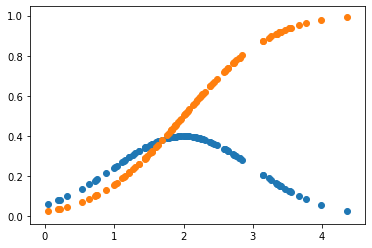

In [85]:
# Instantiate a figure and axes using plt.subplots()
fig, axes = plt.subplots()

# Now call scatter on the object axes to put it on the same graph
axes.scatter(draws,dist.pdf(draws),label='PDF')
axes.scatter(draws,dist.cdf(draws),label='CDF')

The importance of this approach comes when you have more than one figure and we have to put plots in different figures. Below I put the cdf and the pdf on their own figures.

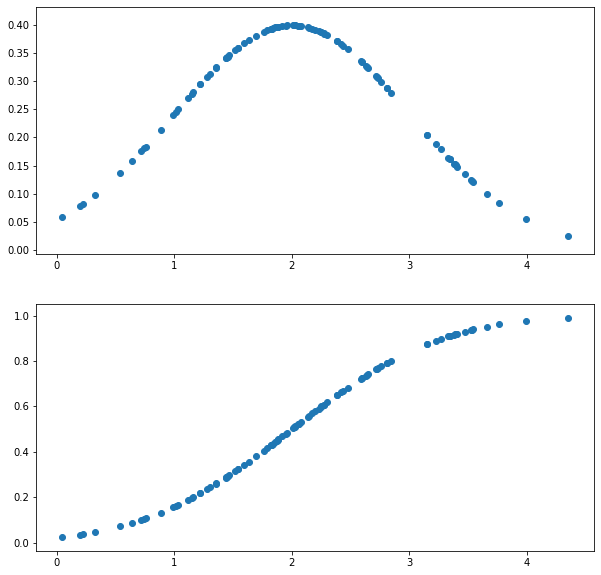

In [88]:
# Instantiate a figure and axes using plt.subplots(), 
# but specify you want 2 rows and 1 column and figure size 10x10
fig, axes = plt.subplots(2,1,figsize=(10,10))

# axes is now an array object, so we have to subset it to tell which 
# one we want to plot on.
axes[0].scatter(draws,dist.pdf(draws),label='PDF')
axes[1].scatter(draws,dist.cdf(draws),label='CDF')

### Exercise:
Create a gamma distribution with the __a__ parameter set to 2. Then draw one-thousand times from it and plot the CDF and PDF.

#### Solution

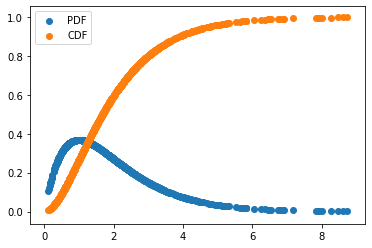

In [16]:
gamma = sp.stats.gamma(a=2)
draws = gamma.rvs(1000)
pdf = gamma.pdf(draws)
cdf = gamma.cdf(draws)

plt.scatter(draws,pdf,label='PDF')
plt.scatter(draws,cdf,label="CDF")
plt.legend()

### Interlude: fake data generation
To learn how to do linear regression in Python, we will generate a fake data set, specifically three variables: $y$, $x$, and $\epsilon$, a noise term. The data generating process is:

$$ y = .5 + 3x + \epsilon$$

where $x$ and $\epsilon$ are normally distributed random variables. We're going to simulate a data set of 1000 draws.

In [40]:
x = sp.stats.norm(loc=10,scale=2).rvs(1000)
e = sp.stats.norm(loc=0,scale=5).rvs(1000)

y = .5 + 3*x + e

Now here we make it look like a real dataset you might see using a package called "pandas"

## Using pandas
pandas mostly works using something called "dataframes," similar to R. We can convert arrays into dataframes by concatenating them. We'll use our fake data.

In [41]:
data = np.vstack([y,x])
# This is now a 2-d array with 1000 rows and 2 columns. 
# We can call this into a pandas dataframe to use it easier
df = pd.DataFrame(data.T)

# We can give things column names
df.columns = ['y','x']

# and then refer to them.
df['x']

0      11.151494
1      13.223824
2       9.462202
3      12.226675
4      10.705407
         ...    
995    13.212081
996    13.591621
997     6.598885
998     7.151328
999     6.830124
Name: x, Length: 1000, dtype: float64

In [42]:
# more than one column:
df[['y','x']]

y          x
0    34.060220  11.151494
1    38.671701  13.223824
2    15.788223   9.462202
3    41.253203  12.226675
4    31.612946  10.705407
..         ...        ...
995  37.267265  13.212081
996  45.165512  13.591621
997  26.397333   6.598885
998  23.966141   7.151328
999  25.169620   6.830124

[1000 rows x 2 columns]

Technical note:
when subsetting, calling df[['x1']] gives us a dataframe and df['x1'] gives us a series. A series is the equivalent of a 1-d array, whereas a dataframe is always 2-d

In [43]:
df[['x']].shape

(1000, 1)

In [44]:
df['x'].shape

(1000,)

In [45]:
# We can subset the data using brackets (similar to R)
# This is a subset of the data where x1 is less than 10.
df[df.x<10]

y         x
2    15.788223  9.462202
5    23.495863  8.144800
8    20.418735  7.864762
9    12.001332  9.454356
14   24.068584  7.852707
..         ...       ...
991  20.117294  7.013004
992  15.388170  5.501378
997  26.397333  6.598885
998  23.966141  7.151328
999  25.169620  6.830124

[516 rows x 2 columns]

In [46]:
# Can also call functions on the data frame and it will do it by each column
df.mean()

y    30.168587
x     9.934047
dtype: float64

In [47]:
df.std()

y    7.694816
x    2.029550
dtype: float64

In [48]:
# a more expansive command
df.describe()

y            x
count  1000.000000  1000.000000
mean     30.168587     9.934047
std       7.694816     2.029550
min       5.755652     4.336444
25%      25.024647     8.608142
50%      30.238850     9.943181
75%      35.153193    11.311552
max      56.009061    16.909690

Which backs up what we know about the DGP.

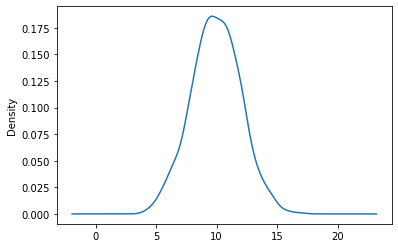

In [49]:
# Can also call .plot() on series to do quick graphs.
# Here is a density plot of x1
df['x'].plot(kind='density')

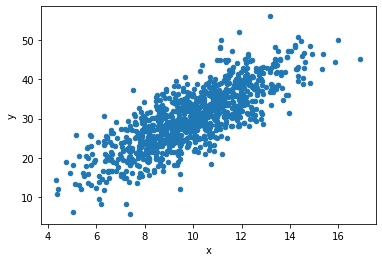

In [50]:
# Here is a scatter plot of x and y
df.plot(kind='scatter',x='x',y='y')

### Exercise:
Plot a density graph of $y$ on a subset of the data where $x$ is below 5

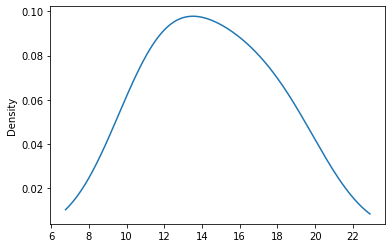

In [51]:
# Solution
subdf = df[df.x<5]
subdf['y'].plot(kind='density')

# Exercise: Linear Regression
The goal is to estimate a linear regression of x on y. We will do this three different ways:
1. Matrix multiplication using numpy
2. MLE using scipy
3. OLS using statsmodels

## 1. numpy
Recall that the formula for the beta coefficients for OLS is:

$$\hat{\beta} = (X'X)^{-1} (X'y) $$

which we can do just using numpy. We have y and X, where X is a matrix with both x and a column of ones (the constant) as columns.

To start you out, using "df" object you can get a numpy array by calling df.values:

In [52]:
type(df)

pandas.core.frame.DataFrame

In [53]:
type(df.values)

numpy.ndarray

In [89]:
# So here are the matrices you need:

# Using dataframes, its easier to just
# create a column of ones
df['constant'] = 1

X = df[['constant','x']].values
y = df[['y']].values
# Note above I used double brackets to get a 2-d array for y instead of a 1-d array

So using numpy arrays:
1. calculate the beta coefficients and make sure they agree with the DGP.
2. calculate the fitted values $\hat{y}$, which is $X\hat{\beta} = X(X'X)^{-1}(X'y)$
3. graph the fitted values on the scatter plot of y and x together.

In [90]:
# Solution
beta = inv(X.T@X)@(X.T@y)
beta

array([[0.61443745],
       [2.97503613]])

In [91]:
yhat = X@beta
yhat

array([[33.79053472],
       [39.95579243],
       [28.76483003],
       [36.98923742],
       [32.46341008],
       [24.84551231],
       [30.91246491],
       [37.6501168 ],
       [24.01238923],
       [28.74148672],
       [33.94630094],
       [31.77140808],
       [30.66395729],
       [31.20873344],
       [23.97652356],
       [36.66791383],
       [33.35642585],
       [26.88284123],
       [17.38118168],
       [21.72958324],
       [28.61343726],
       [32.94487529],
       [29.53211132],
       [43.77047625],
       [38.11546828],
       [27.83274476],
       [21.12991674],
       [35.08663514],
       [28.03835624],
       [38.10267088],
       [33.49974694],
       [27.60429936],
       [18.74285814],
       [30.27551097],
       [27.76642702],
       [28.68127585],
       [19.30805201],
       [31.65765438],
       [32.44862138],
       [27.23975033],
       [35.56842251],
       [22.24217362],
       [23.39975454],
       [28.54512606],
       [26.44539734],
       [50

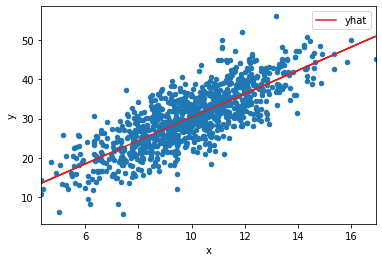

In [57]:
# with pandas

# you can feed an array to a column in a pandas dataframe
# to create a new column
df['yhat'] = yhat

# instantiate plot
fig, ax = plt.subplots()

# NOTE: to do the plot subfunction of a pandas dataframe, we have to specify the axes
# so we use the "ax" argument to put both of these plots on the same plot.
df.plot(kind='scatter',y='y',x='x',ax=ax)
df.plot(y='yhat',x='x',color='C3',ax=ax

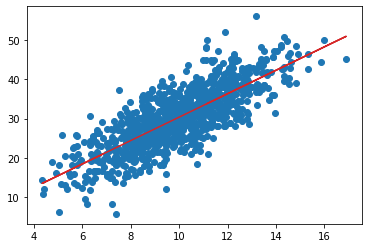

In [58]:
## OR matplotlib and arrays
 
plt.scatter(x,y)
plt.plot(x,yhat,color="C3")

which agrees with the above.

## 2. MLE using scipy

Since in the DGP we have a normally distributed error term, we can also use maximum likelihood to estimate the model.

In this example, I use a combination of a function and a scipy optimizer.

First, the likelihood function. The formula is
$$ L(\hat{\sigma},\hat{\beta},\hat{\alpha}|y,x) = (2\pi\hat{\sigma}^2)^{-n/2} exp\Big(- \frac{1}{2\hat{\sigma}^2} \sum^N_{i=1} (y_i-\hat{\alpha} -\hat{\beta}x_i)^2\Big)$$
with log-likelihood:
$$ l(\hat{\sigma},\hat{\beta},\hat{\alpha}|y,x) =  -\frac{n}{2}ln(2\pi\hat{\sigma}^2) - \frac{1}{2\hat{\sigma}^2} \sum_{i=1}^N (y_i-\hat{\alpha} -\hat{\beta}x_i)^2  $$

In [92]:
# Goal is to make a function that takes starting values
# and data and spits out the log likelihood

# We make the parameters the first argument because in the
# optimizer function we need to stash secondary arguments
# in an argument called "args"

def ll(params,data):
    # parameters
    alpha, beta, sigma = params
    # a tuple which stores x and y
    X,y = data
    # get n
    n = X.shape[0]
    # prediction
    yhat = alpha + beta*X
    # residual
    e = y - yhat
    # return the ll from the above formula
    return (n/2)*np.log(2*np.pi*sigma**2) + (1/(2*sigma**2))*(sum(e**2))

To minimize this function, we need an optimizer

In [93]:
from scipy.optimize import minimize

# The argmuents for the optimizer "minimize" are:
# - function
# - starting values
# - other arguments (in this case the data)
#   which I pass to the function as a tuple.
minimize(ll,[0,0,1],args=([x,y[:,0]]))

# y has that added index [:,0] because it is
# 2 dimensions and needs to be passed as 1-d.

      fun: 2980.785433569517
 hess_inv: array([[ 0.05264784, -0.00496316, -0.02458403],
       [-0.00496316,  0.0006783 ,  0.00231452],
       [-0.02458403,  0.00231452,  0.0122615 ]])
      jac: array([0.00000000e+00, 3.05175781e-05, 9.15527344e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 241
      nit: 35
     njev: 48
   status: 2
  success: False
        x: array([0.61444142, 2.97503576, 4.76761871])

Using MLE, we got the same results as the other matrix calculation but also calculated the standard deviation of the error term, which we assumed was normally distributed.

We can do this same calculation using statsmodels to do linear regression, however.

## 3. Statsmodels

Using just matrices

In [95]:
# Using matrices
from statsmodels.regression.linear_model import OLS
# Instantiates the model only
model = OLS(y,X)
# next fit the model
model = model.fit()
# finally, you can call summary to give you info about the mode
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     1599.
Date:                Tue, 30 Jul 2019   Prob (F-statistic):          1.75e-209
Time:                        12:42:02   Log-Likelihood:                -2980.8
No. Observations:                1000   AIC:                             5966.
Df Residuals:                     998   BIC:                             5975.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6144      0.754      0.815      0.416      -0.866       2.095
x1             2.9750      0.074     39.989      0.000       2.829       3.121
==============================================================================
Omnibus:                        3.337   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.189   Jarque-Bera (JB):                3.498
Skew:                           0.067   Prob(JB):                        0.174
Kurtosis:                       3.257   Cond. No.                         51.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Using the formula api in stats models allows you to use something more similar to STATA and R

In [96]:
from statsmodels.formula.api import ols

In [97]:
# Note that one of the arguments, data, is a pandas dataframe
model = ols("y~1 + x",data=df)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     1599.
Date:                Tue, 30 Jul 2019   Prob (F-statistic):          1.75e-209
Time:                        12:42:19   Log-Likelihood:                -2980.8
No. Observations:                1000   AIC:                             5966.
Df Residuals:                     998   BIC:                             5975.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6144      0.754      0.815      0.416      -0.866       2.095
x              2.9750      0.074     39.989      0.000       2.829       3.121
==============================================================================
Omnibus:                        3.337   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.189   Jarque-Bera (JB):                3.498
Skew:                           0.067   Prob(JB):                        0.174
Kurtosis:                       3.257   Cond. No.                         51.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Note: this is where it counts to have a pandas dataframe "df" with labeled columns. You cannot use the formula API as above without a dataframe that has labeled columns. Without it, you have to construct matrices X and y, just as in the numpy example.